In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Loading

In [2]:
df = pd.read_csv('data/parkinsons_updrs.data')

In [3]:
X_train_scaled = pd.read_pickle('data/X_train_scaled.pkl')
X_test_scaled = pd.read_pickle('data/X_test_scaled.pkl')
y_train_common = pd.read_pickle('data/y_train_common.pkl')
y_train_motor = pd.read_pickle('data/y_train_motor.pkl')
y_train_total = pd.read_pickle('data/y_train_total.pkl')

In [4]:
X_train_scaled

,sex,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,RPDE,DFA,PPE,age,test_time,Shimmer(dB),HNR
0,0,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.01438,0.01309,0.01662,0.04314,0.014290,0.41888,0.54842,0.16006,0.793103,0.023929,0.104938,0.491608
1,0,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.00994,0.01072,0.01689,0.02982,0.011112,0.43493,0.56477,0.10810,0.793103,0.056595,0.078704,0.665184
2,0,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.00734,0.00844,0.01458,0.02202,0.020220,0.46222,0.54405,0.21014,0.793103,0.089224,0.079733,0.535667
3,0,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.01106,0.01265,0.01963,0.03317,0.027837,0.48730,0.57794,0.33277,0.793103,0.116974,0.154835,0.579445
4,0,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.00679,0.00929,0.01819,0.02036,0.011625,0.47188,0.56122,0.19361,0.793103,0.154161,0.077160,0.632085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714,1,0.00816,0.000038,0.00426,0.00441,0.01277,0.05682,0.03158,0.02903,0.03797,0.09473,0.051096,0.67310,0.63374,0.39288,0.655172,0.716268,0.286523,0.333187
5715,1,0.00921,0.000048,0.00489,0.00503,0.01468,0.03712,0.01850,0.02106,0.03318,0.05551,0.053824,0.63081,0.63657,0.34319,0.655172,0.748967,0.153292,0.346026
5716,1,0.00551,0.000024,0.00272,0.00296,0.00815,0.03270,0.01685,0.01890,0.02744,0.05056,0.028904,0.60975,0.64369,0.25823,0.655172,0.786084,0.117798,0.509269
5717,1,0.01473,0.000075,0.00827,0.00814,0.02481,0.05259,0.02828,0.03226,0.04485,0.08483,0.093820,0.65047,0.65848,0.38566,0.655172,0.813993,0.262346,0.279295


In [5]:
# sns.set(style="whitegrid")
# sns.pairplot(df, diag_kind="kde", markers='o', hue='subject#', palette='husl')
# plt.savefig('pairplot.png')

In [6]:
# df.drop(columns=['subject#'], inplace=True)

## Box plot of the features (for outliers)

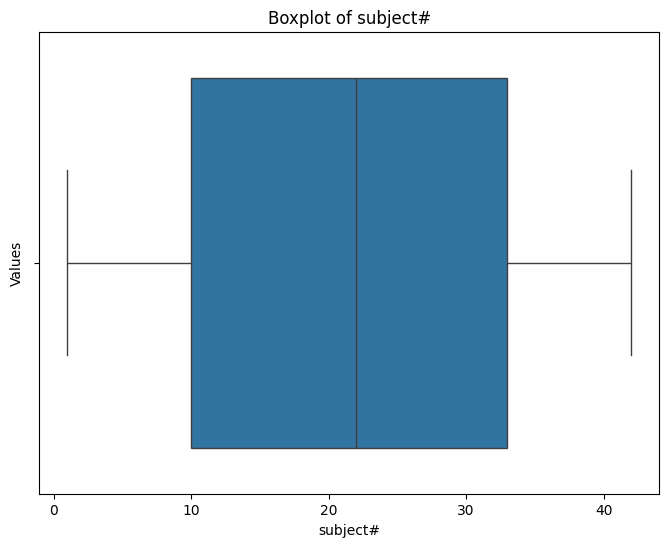

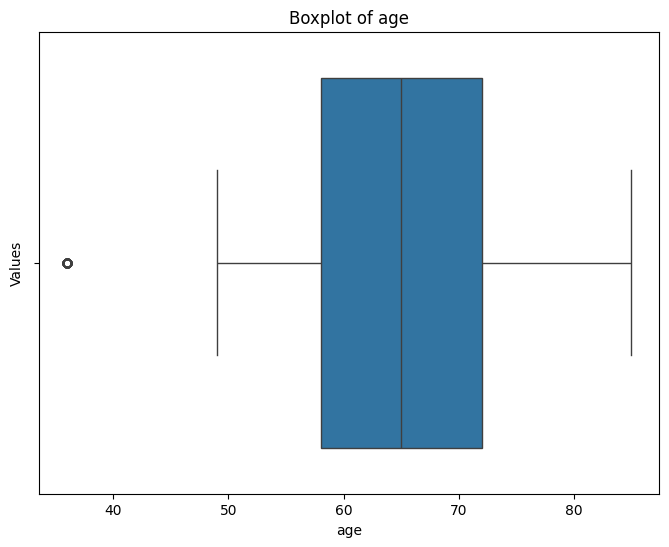

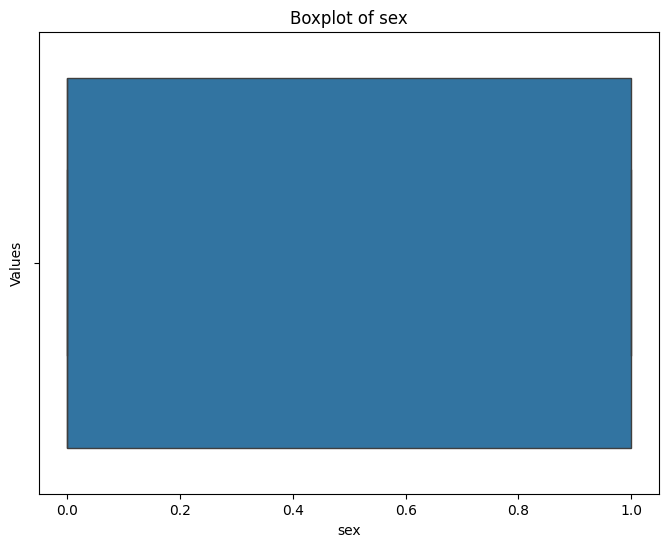

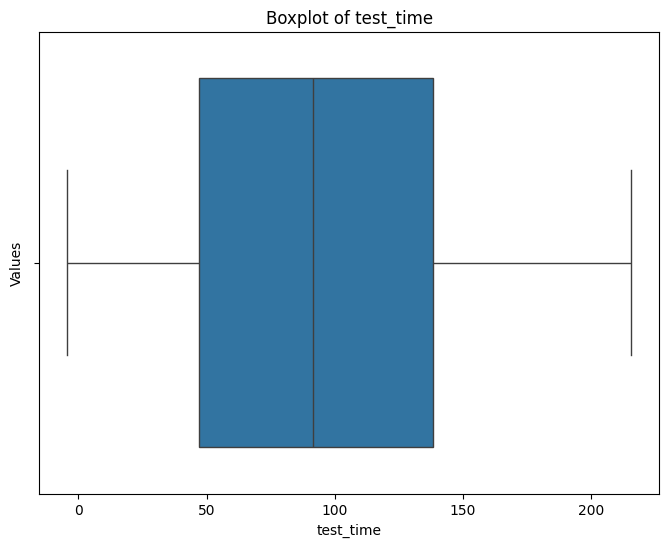

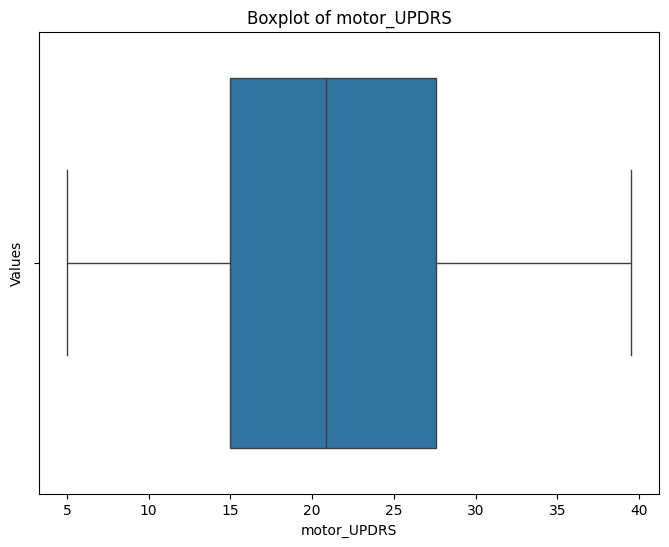

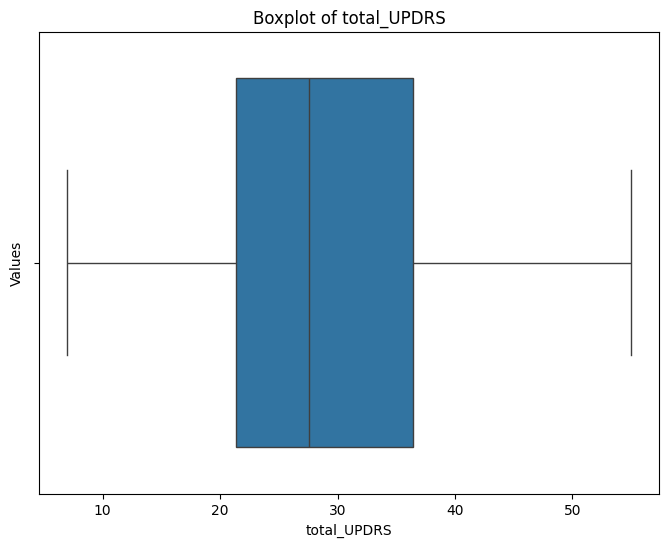

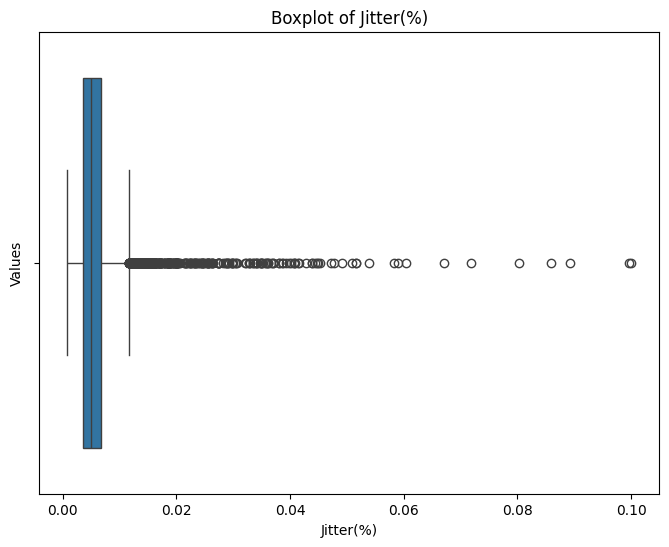

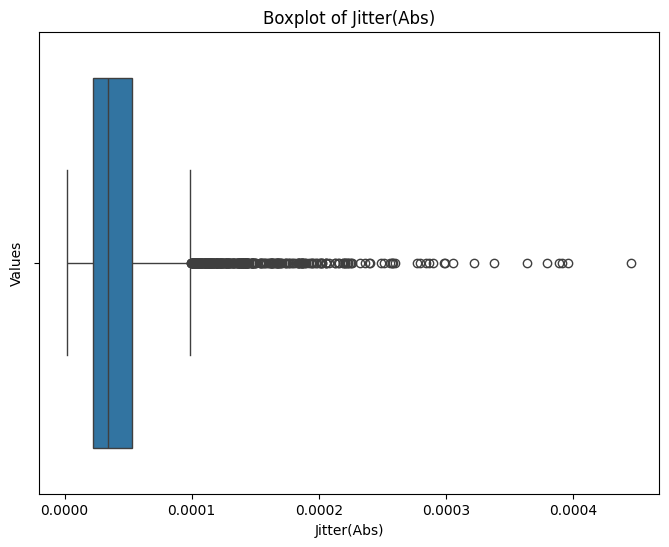

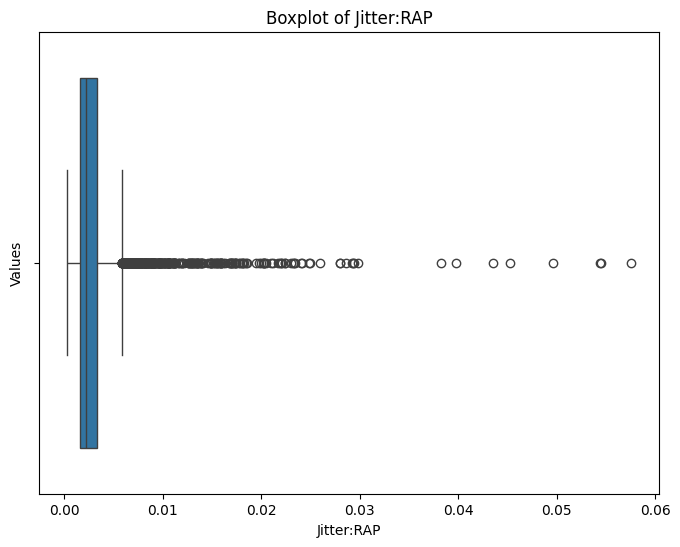

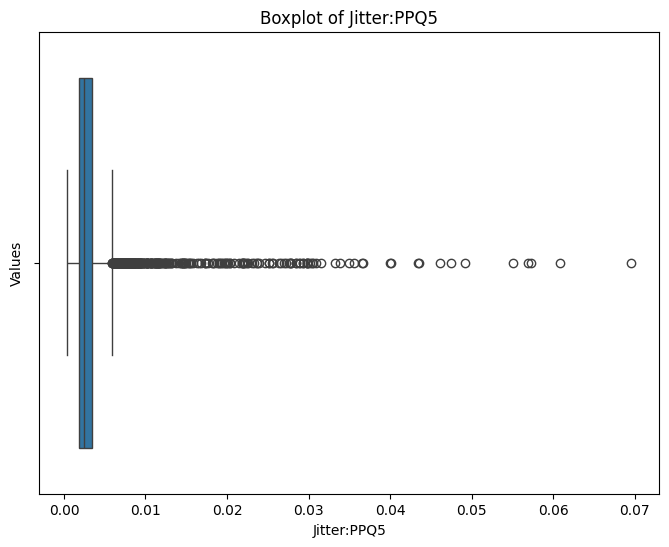

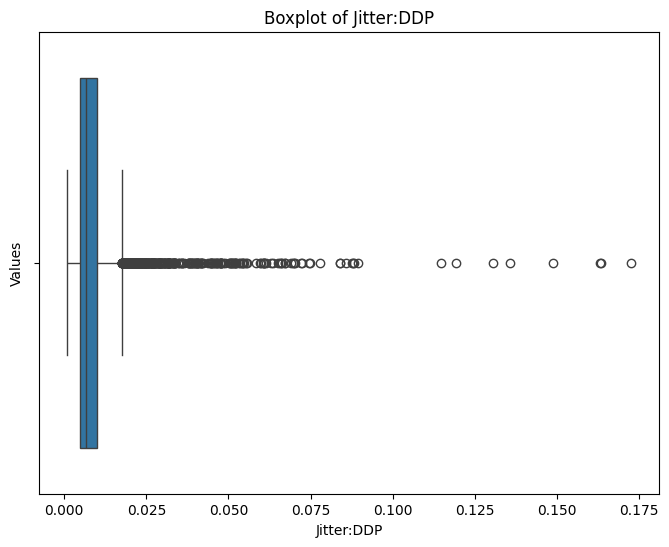

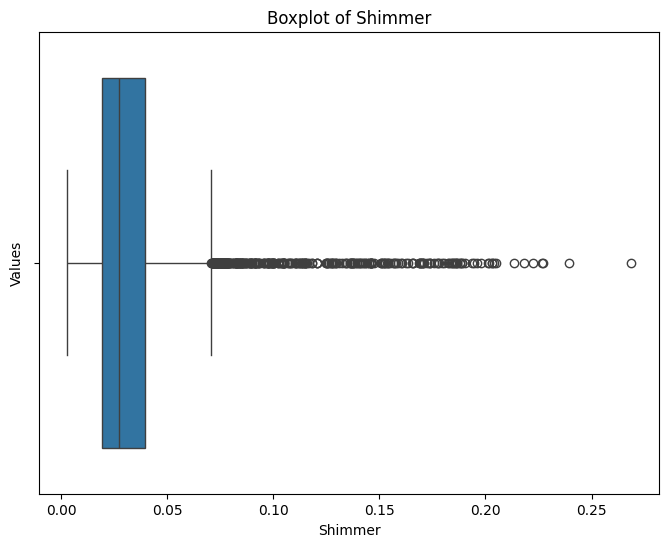

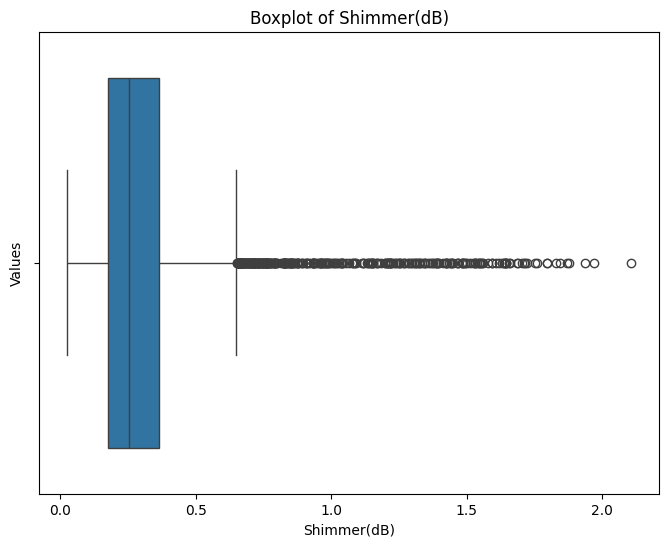

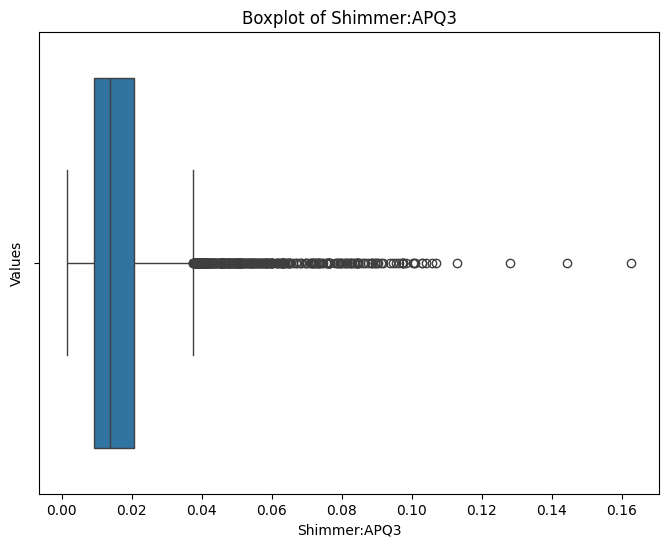

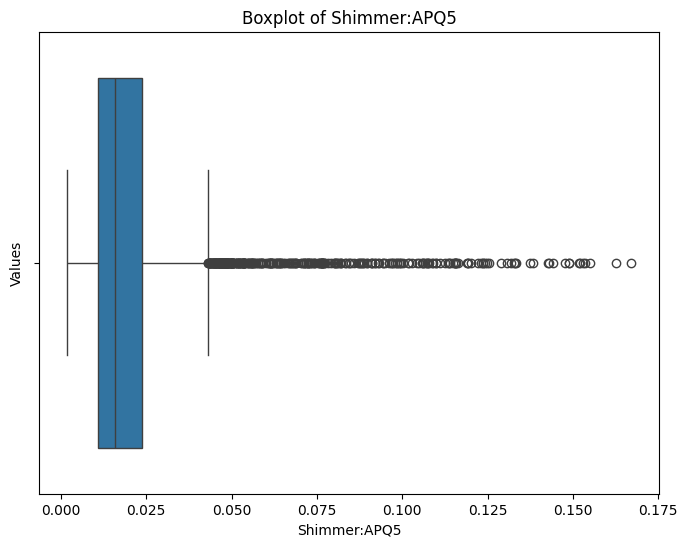

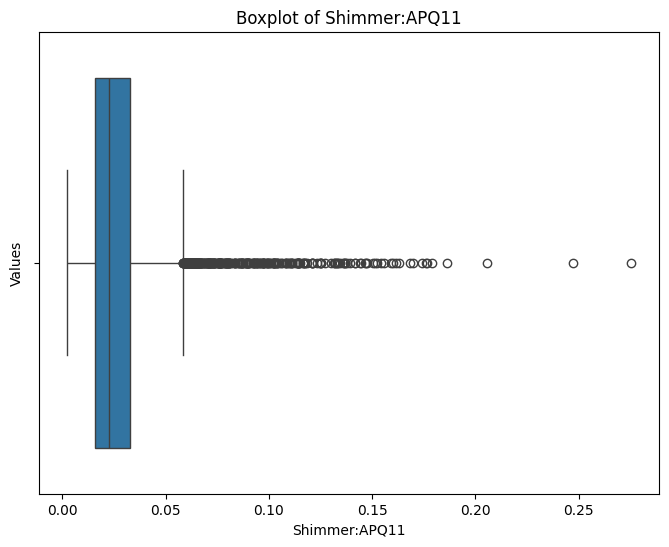

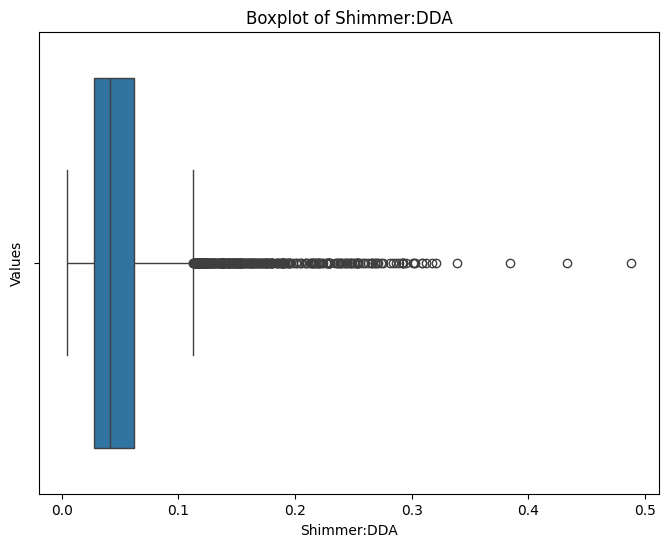

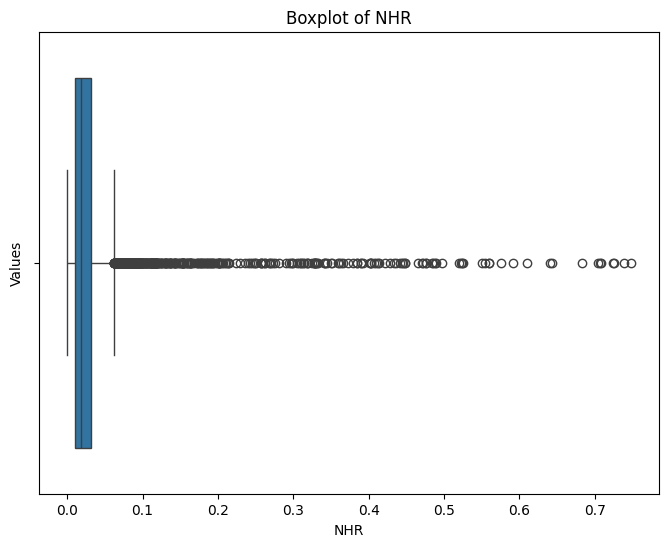

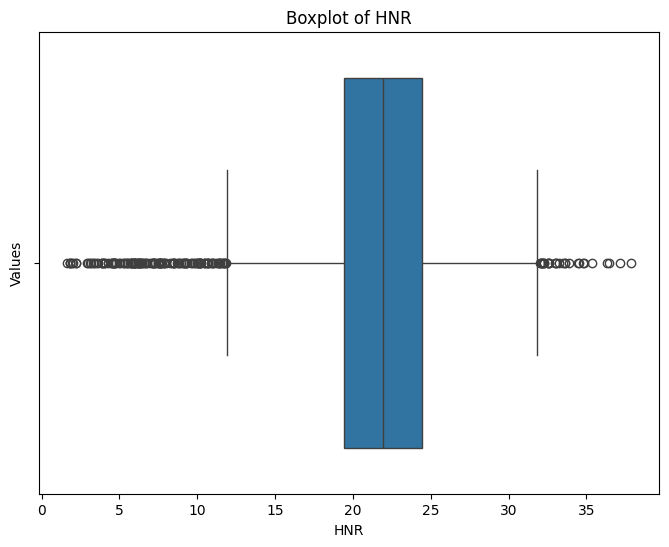

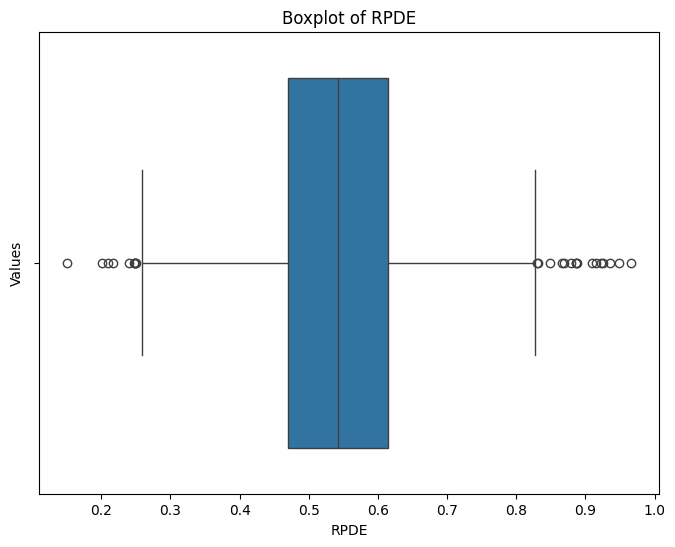

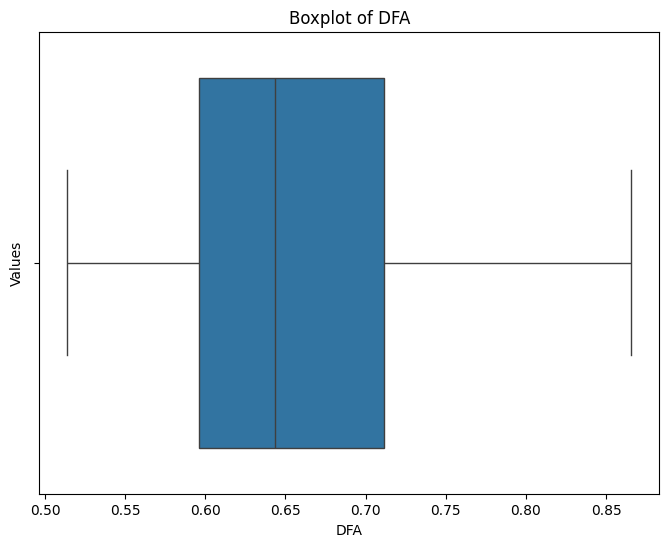

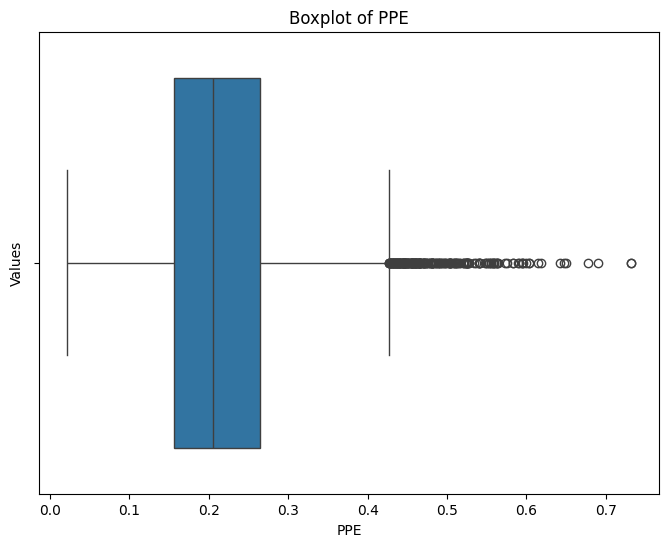

In [7]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for feature in numeric_columns:
    plt.figure(figsize=(8, 6)) 
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Values')
    plt.show()


## PCA

/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/behnazrezaeifar/

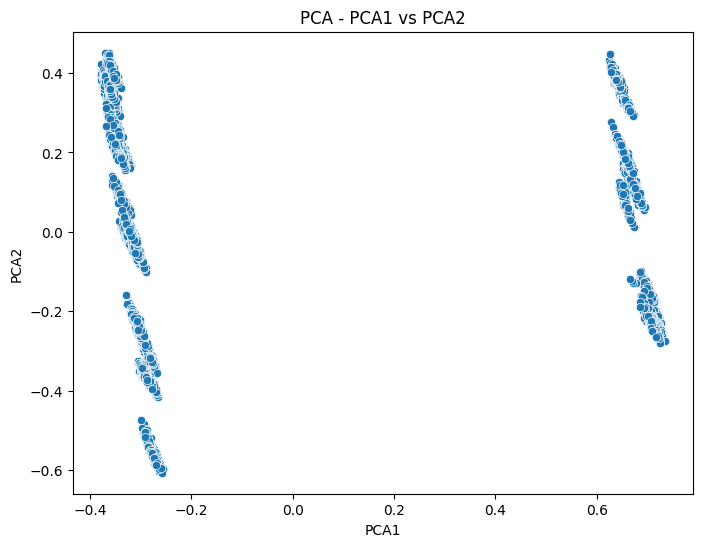

In [8]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1])
plt.title('PCA - PCA1 vs PCA2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

Not Good!

let's cluster the pca

/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/skl

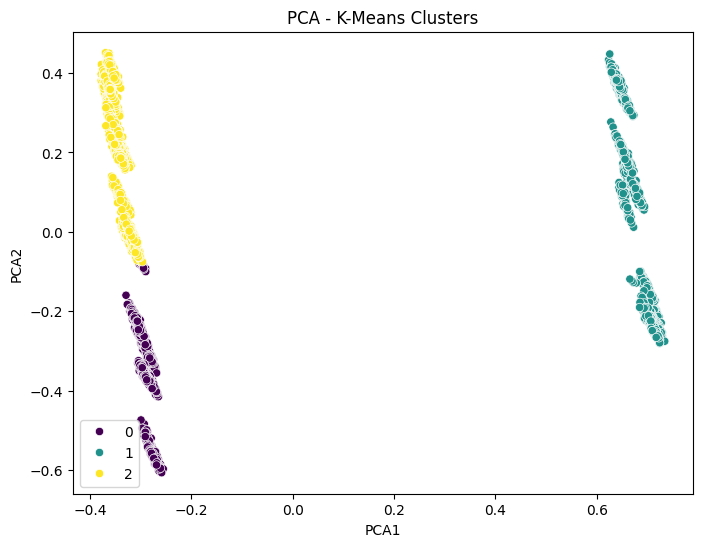

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42) 
clusters = kmeans.fit_predict(X_train_pca) 

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('PCA - K-Means Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

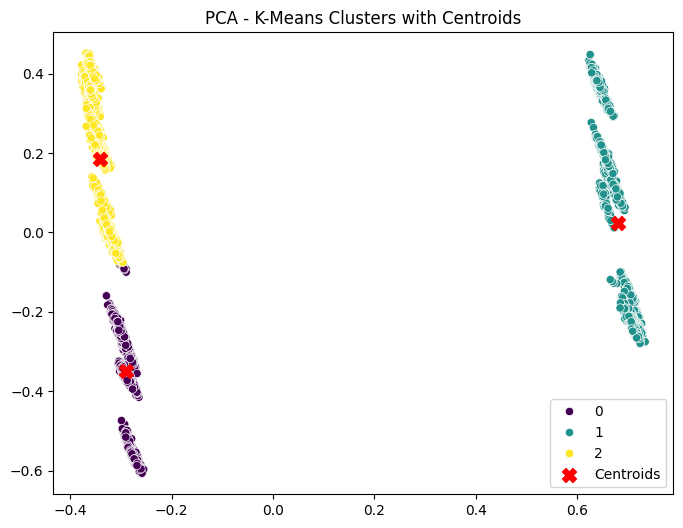

In [10]:
cluster_centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=clusters, palette='viridis', legend='full')

plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='X', color='red', s=100, label='Centroids')
plt.title('PCA - K-Means Clusters with Centroids')
plt.legend()
plt.show()

In [11]:
silhouette_avg = silhouette_score(X_train_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6893064445658724


/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Not bad

**Agglomerative Clustering might be good for feature selection**

## TSNE

/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11

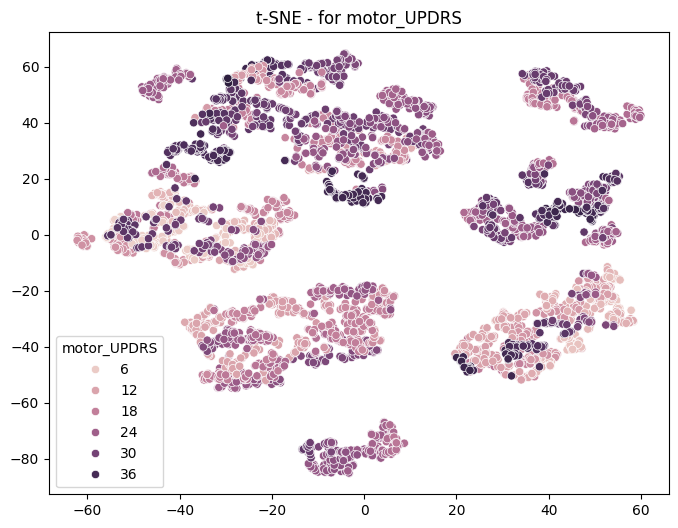

In [12]:
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled) 

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train_motor)
plt.title('t-SNE - for motor_UPDRS')
plt.show()

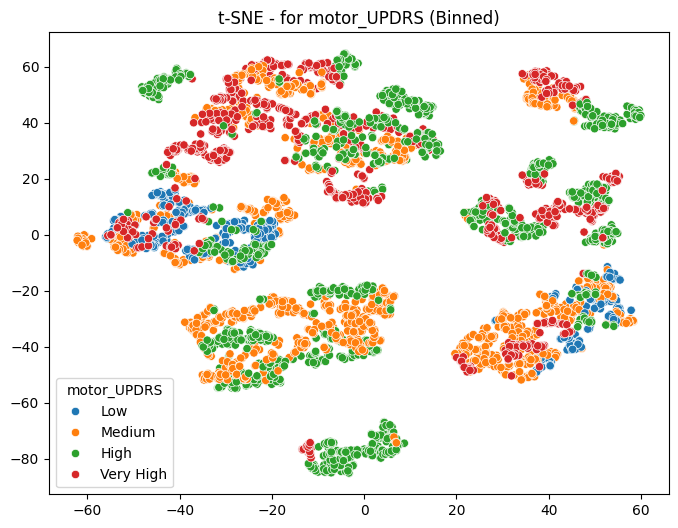

In [13]:
bins = [0, 10, 20, 30, 40] 
labels = ['Low', 'Medium', 'High', 'Very High']
y_train_motor_binned = pd.cut(y_train_motor, bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train_motor_binned)
plt.title('t-SNE - for motor_UPDRS (Binned)')
plt.show()


Check for other target!

## Correlation Analysis

In [14]:
correlation_matrix = X_train_scaled.corr()

correlation_target_motor = X_train_scaled.corrwith(y_train_motor)
correlation_target_total = X_train_scaled.corrwith(y_train_total)

correlation_targets = y_train_motor.corr(y_train_total)

print(f"Correlation between motor_UPDRS and total_UPDRS: {correlation_targets}")
print("\nCorrelation with motor_UPDRS:")
print(correlation_target_motor)
print("\nCorrelation with total_UPDRS:")
print(correlation_target_total)

Correlation between motor_UPDRS and total_UPDRS: 0.9485482585973681

Correlation with motor_UPDRS:
sex              0.002723
Jitter(%)        0.102447
Jitter(Abs)      0.008768
Jitter:RAP       0.093290
Jitter:PPQ5      0.109888
Jitter:DDP       0.093329
Shimmer          0.094002
Shimmer:APQ3     0.072179
Shimmer:APQ5     0.083283
Shimmer:APQ11    0.127080
Shimmer:DDA      0.072179
NHR              0.103090
RPDE             0.135492
DFA             -0.126146
PPE              0.165589
age              0.303114
test_time        0.090617
Shimmer(dB)      0.104004
HNR             -0.207876
dtype: float64

Correlation with total_UPDRS:
sex             -0.085569
Jitter(%)        0.117774
Jitter(Abs)      0.071695
Jitter:RAP       0.097074
Jitter:PPQ5      0.123752
Jitter:DDP       0.097107
Shimmer          0.102798
Shimmer:APQ3     0.081414
Shimmer:APQ5     0.095916
Shimmer:APQ11    0.138917
Shimmer:DDA      0.081415
NHR              0.094245
RPDE             0.180400
DFA             -0.0815

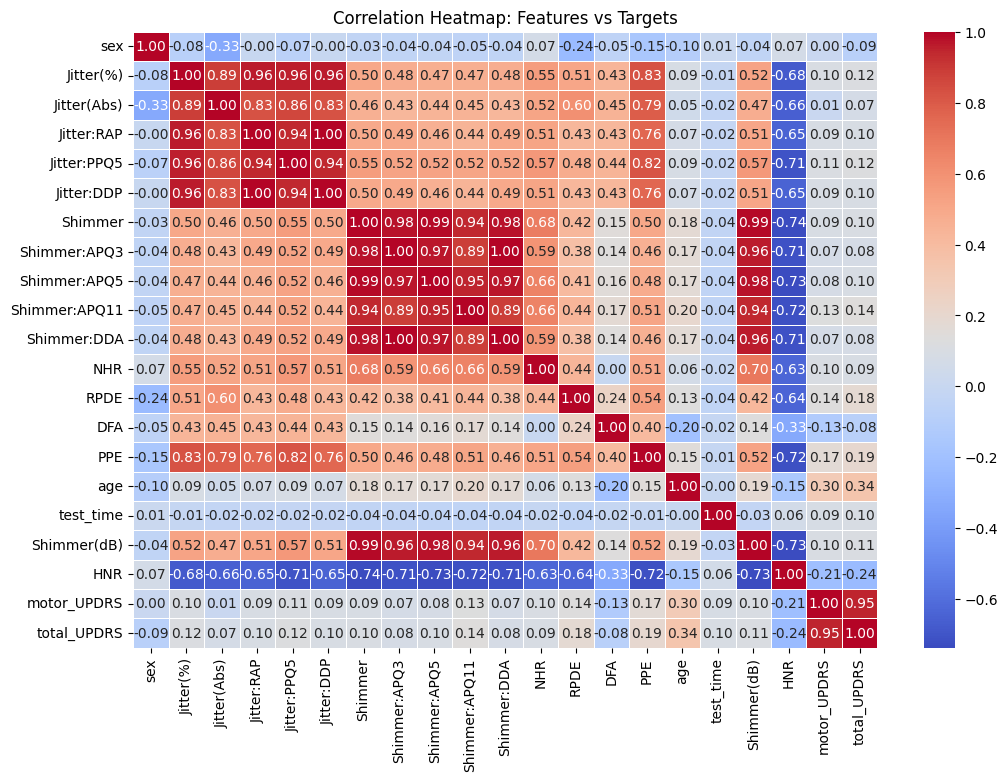

In [15]:
X_train_with_targets = X_train_scaled.copy()
X_train_with_targets['motor_UPDRS'] = y_train_motor
X_train_with_targets['total_UPDRS'] = y_train_total

correlation_matrix = X_train_with_targets.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Features vs Targets')
plt.show()

## Distribution of other features

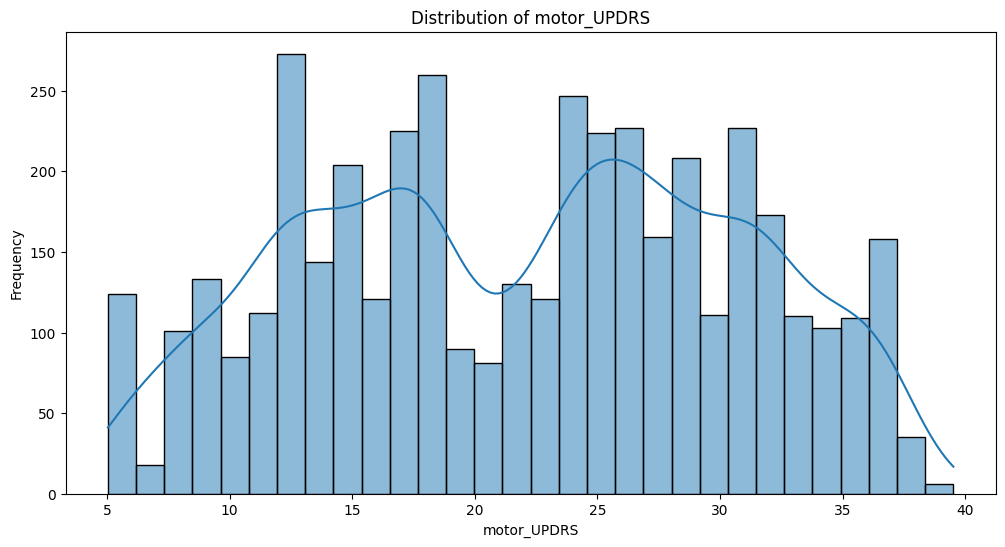

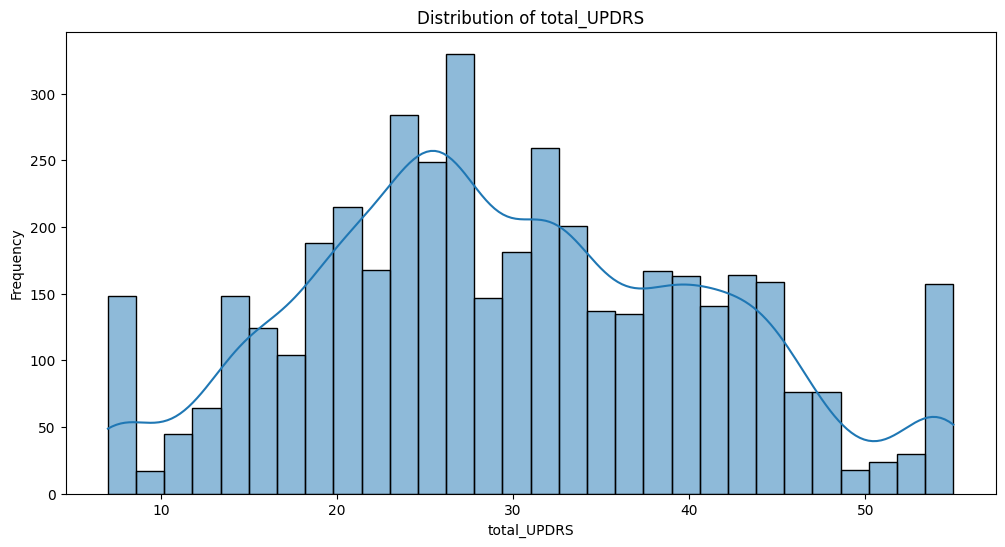

In [18]:
# Plot the distribution of the target variables
plt.figure(figsize=(12, 6))
sns.histplot(y_train_motor, bins=30, kde=True)
plt.title('Distribution of motor_UPDRS')
plt.xlabel('motor_UPDRS')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(12, 6))
sns.histplot(y_train_total, bins=30, kde=True)
plt.title('Distribution of total_UPDRS')
plt.xlabel('total_UPDRS')
plt.ylabel('Frequency')
plt.show()

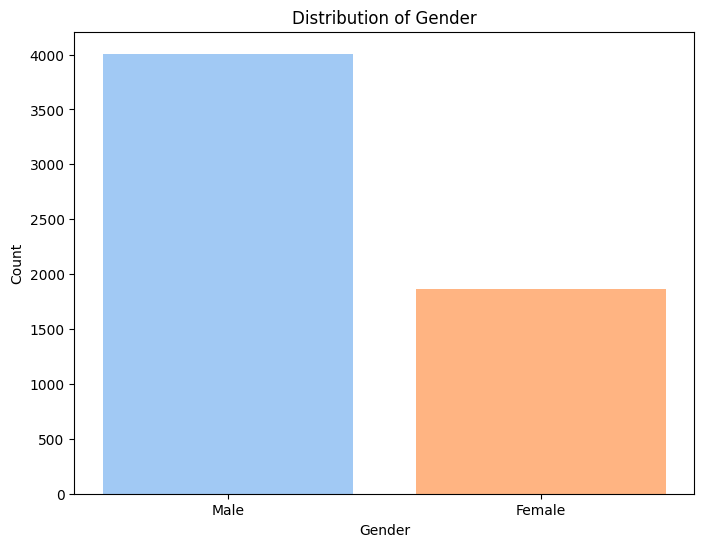

In [25]:
# Plot the distribution of the gender variable
plt.figure(figsize=(8, 6))
gender_counts = df['sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=sns.color_palette('pastel'))
# put the x labels male for 0 and female for 1
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Text(0.5, 1.0, 'Distribution of gender for motor_UPDRS')

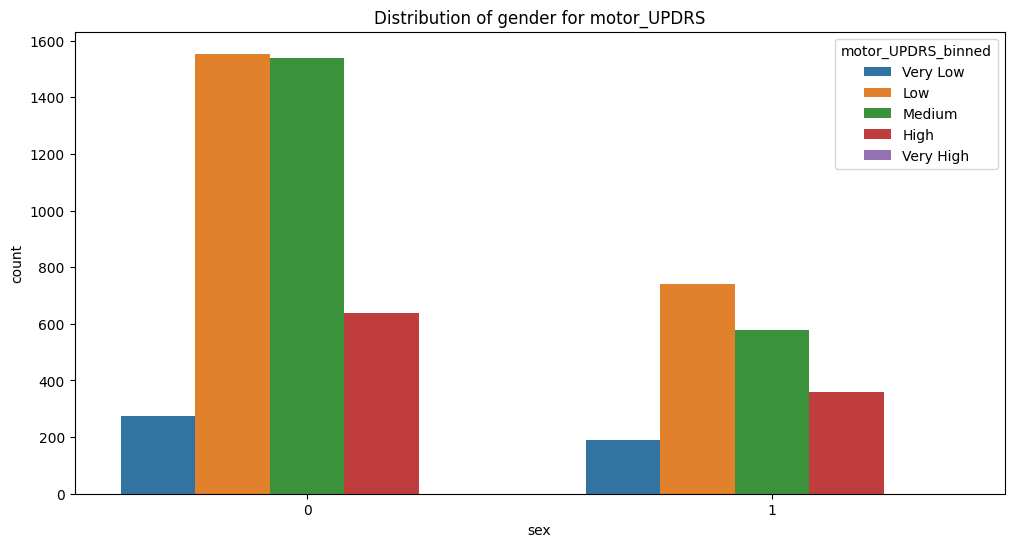

In [26]:
# Bin the motor_UPDRS and total_UPDRS into categories
bins = [0, 10, 20, 30, 40, 50]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['motor_UPDRS_binned'] = pd.cut(df['motor_UPDRS'], bins=bins, labels=labels, include_lowest=True)
df['total_UPDRS_binned'] = pd.cut(df['total_UPDRS'], bins=bins, labels=labels, include_lowest=True)

# Plot the distribution of sex for each target
plt.figure(figsize=(12, 6))
sns.countplot(x=df['sex'], hue=df['motor_UPDRS_binned'])
plt.title('Distribution of gender for motor_UPDRS')

# plt.figure(figsize=(12, 6))
# sns.countplot(x=df['sex'], hue=df['total_UPDRS_binned'])
# sns.scatterplot(x=df['motor_UPDRS'], y=df['total_UPDRS'], hue=df['sex'], palette='coolwarm', alpha=0.7)
# plt.title('Scatterplot of motor_UPDRS vs total_UPDRS by Gender')
# plt.xlabel('motor_UPDRS')
# plt.ylabel('total_UPDRS')
# plt.legend(title='Gender', labels=['Male', 'Female'])

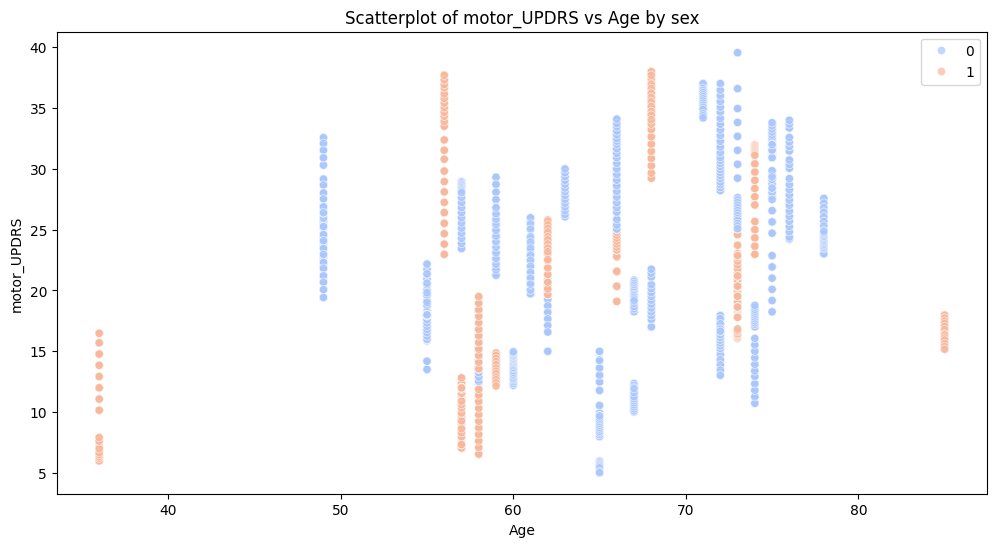

In [ ]:
# Scatter plot of age based on gender
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['age'], y=df['motor_UPDRS'], hue=df['sex'], palette='coolwarm', alpha=0.7)
plt.title('Scatterplot of motor_UPDRS vs Age by gender')
plt.xlabel('Age')
plt.ylabel('motor_UPDRS')
plt.legend()
plt.show()